In [31]:
import matplotlib.pyplot as plt
import numpy as np
import time

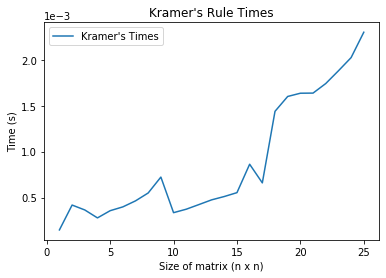

0.18291354179382324 seconds


In [33]:
t1 = time.time()
S =  25 # Maximum matrix size
kramersTimesList = []  # Empty list to store the time values in
sizeList = []  # Empty list to store the sizes of the matrices
# I used lists to keep track of the values because I was having trouble creating an empty array and then appending
# the values to it.


for size in range(1,S+1):  # Start at 1 because we need to have the first matrix be of size 1, can't have one of size 0
    detA = 0
    while detA == 0:  # This will ensure the determinant does not equal zero, ensuring linear independance 
        # Create an array (matrix) of random integers, min value is 0 by default, max value is set to 10 but can be changed
        A = np.random.randint(10, size = [size,size])

        detA = np.linalg.det(A)  # Find determinant of A
        # This is just in case so to not cause a divide by 0 error in the loop below. This skips the rest of this iteration
        # and tries again.
        if detA == 0:  
            continue

        detAi = 0
        while detAi == 0:  # Same case as the above while loop
            timeStart = time.time()  # Start time
            B = np.random.randint(10, size = [size])  # Generate a random B matrix to repalce the columns of A with.
            # It is created here so that if, by replacing a column of A, makes detA = 0, it will generate a new B matrix
            # and try again.
            for i in range(size):
                Ai = np.copy(A)  # Copy the A matrix to change columns
                Ai[:, i] = B  # Replace column i of Ai (a copy of A) with B
                detA = np.linalg.det(A)  # Compute detA again to capture full time that it takes to solve for xi using Kramer's Rule
                detAi = np.linalg.det(Ai)  # Compute determinant of Ai
                xi = detAi / detA  # Kramer's Rule
            timeEnd = time.time()  # End time
            timeKramers = timeEnd - timeStart    
        
    # These are added once an invertible A was created (i.e. detA != 0), and every matrix that was created by replacing each column
    # with B was also invertible
    sizeList.append(size)  # Add size to the size list
    kramersTimesList.append(timeKramers)
    

# Convert our time and size lists to arrays in order to plot them. pyplot expects arrays as inputs
sizes = np.array(sizeList)
kramersTimes = np.array(kramersTimesList)

# Plot the times
plt.plot(sizes, kramersTimes, label='Kramer\'s Times') 
plt.xlabel('Size of matrix (n x n)')
plt.ylabel('Time (s)')
plt.title("Kramer's Rule Times")
plt.legend()
plt.ticklabel_format(axis='y', scilimits=(0,0))
plt.show()
t2 = time.time()
print(t2 - t1, "seconds")

![Title](img\Linear Project 2 Graph1.png)


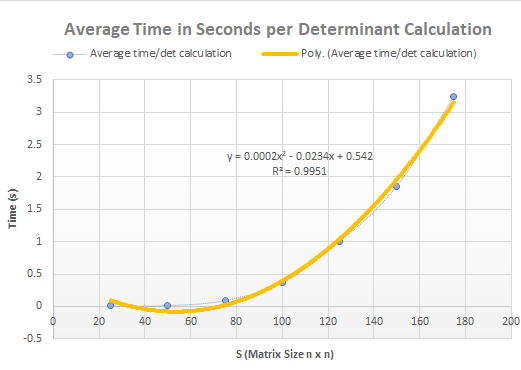

In [34]:
from IPython.display import Image
Image("img/Linear Project 2 Graph1.png")

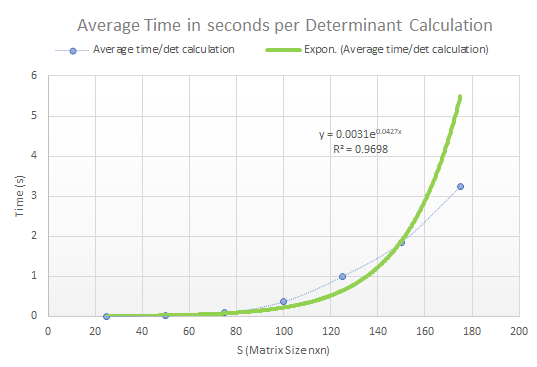

In [35]:
from IPython.display import Image
Image("img/Linear Project 2 Graph2.png")

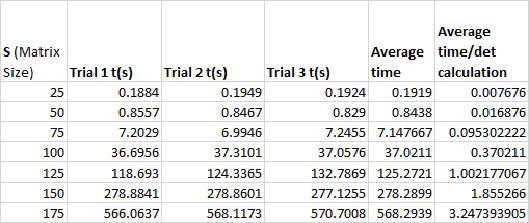

In [36]:
from IPython.display import Image
Image("img/Linear Project 2 Data.png")